# EDA For The Textual Dataset For Skin Cancer Detector Ml Model.

---

In [12]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Importing the dataset
df=pd.read_csv("metadata_original.csv")
df.head(5)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


In [14]:
df.dtypes

patient_id              object
lesion_id                int64
smoke                   object
drink                   object
background_father       object
background_mother       object
age                      int64
pesticide               object
gender                  object
skin_cancer_history     object
cancer_history          object
has_piped_water         object
has_sewage_system       object
fitspatrick            float64
region                  object
diameter_1             float64
diameter_2             float64
diagnostic              object
itch                    object
grew                    object
hurt                    object
changed                 object
bleed                   object
elevation               object
img_id                  object
biopsed                   bool
dtype: object

## Removing Irrelevant Columns

#### Removing the columns 'patient_id', 'lesion_id','background_father','background_mother', 'diameter_2', 'elevation', and 'biopsied' as they are irrelevant to our analysis.
#### Column 'biopsied' is being dropped as it is highly correlated to our target variable.


In [15]:
df=df.drop(['patient_id','lesion_id','background_father','background_mother','diameter_2','elevation','biopsed'],axis=1)

In [16]:
df.columns

Index(['smoke', 'drink', 'age', 'pesticide', 'gender', 'skin_cancer_history',
       'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick',
       'region', 'diameter_1', 'diagnostic', 'itch', 'grew', 'hurt', 'changed',
       'bleed', 'img_id'],
      dtype='object')

## Renaming Columns for better understanding

In [17]:
df = df.rename(columns={'diameter_1':'diameter','smoke':'smokes','drink':'drinks','pesticide':'pesticide_exposure','diagnostic':'RESULT','fitspatrick':'fitzpatrick'})
df.columns

Index(['smokes', 'drinks', 'age', 'pesticide_exposure', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitzpatrick', 'region', 'diameter', 'RESULT',
       'itch', 'grew', 'hurt', 'changed', 'bleed', 'img_id'],
      dtype='object')

## Handling null values

#### Null values in the following columns 'smokes', 'drinks', 'pesticide_exposore', 'has_piped_water', 'has_sewage_system', and 'fitzpatrick' will be filled with the mode of each column respectively.
#### Null values in columns such as 'skin_cancer_history' & 'cancer_history' will be filled with FALSE, we will assume the patient has not had cancer before.

In [18]:
# Fill missing values using mode for categorical columns
columns = ['smokes', 'drinks', 'pesticide_exposure','has_piped_water', 'has_sewage_system', 'fitzpatrick']

for col in columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Fill missing values using the mean for the numeric column
df['diameter'].fillna(df['diameter'].mean(), inplace=True)

# Fill missing values for 'skin_cancer_history' & 'cancer_history' column.
df['skin_cancer_history'].fillna('False', inplace=True)
df['cancer_history'].fillna('False', inplace=True)
df['gender'].fillna('OTHER', inplace=True)
df.head(5)


,smokes,drinks,age,pesticide_exposure,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitzpatrick,region,diameter,RESULT,itch,grew,hurt,changed,bleed,img_id
0,False,False,8,False,OTHER,False,False,True,True,2.0,ARM,11.897055,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png
1,False,False,55,False,FEMALE,True,True,True,True,3.0,NECK,6.000000,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_46_881_939.png
2,False,False,77,False,OTHER,False,False,True,True,2.0,FACE,11.897055,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png
3,False,False,75,False,OTHER,False,False,True,True,2.0,HAND,11.897055,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png
4,False,True,79,False,MALE,True,False,False,False,1.0,FOREARM,5.000000,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,PAT_684_1302_588.png


## Encoding values
#### i. Binary Encoding: For binary categorical columns.
#### ii. One-Hot Encoding: For nominal categorical columns (region, gender).

In [19]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['region'], prefix='region')
df = pd.get_dummies(df, columns=['gender'], prefix='gender')
print("All Columns: ",df.columns,'\n')

# Binary Encoding
binary_columns = [
    'smokes','drinks','pesticide_exposure','skin_cancer_history',
    'cancer_history','has_piped_water','has_sewage_system','itch',
    'grew','hurt','changed','bleed',
    'region_ABDOMEN', 'region_ARM', 'region_BACK', 'region_CHEST',
       'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM',
       'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE',
       'region_SCALP', 'region_THIGH', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER'
    ]

for col in binary_columns:
    df[col] = df[col].replace({True: 1, False: 0, 'TRUE':1, 'FALSE':0, 'False':0, 'UNK':-1})

df.head(5)

All Columns:  Index(['smokes', 'drinks', 'age', 'pesticide_exposure', 'skin_cancer_history',
       'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitzpatrick',
       'diameter', 'RESULT', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'img_id', 'region_ABDOMEN', 'region_ARM', 'region_BACK', 'region_CHEST',
       'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM',
       'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE',
       'region_SCALP', 'region_THIGH', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER'],
      dtype='object') 



,smokes,drinks,age,pesticide_exposure,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitzpatrick,diameter,...,region_FOREARM,region_HAND,region_LIP,region_NECK,region_NOSE,region_SCALP,region_THIGH,gender_FEMALE,gender_MALE,gender_OTHER
0,0,0,8,0,0,0,1,1,2.0,11.897055,...,0,0,0,0,0,0,0,0,0,1
1,0,0,55,0,1,1,1,1,3.0,6.000000,...,0,0,0,1,0,0,0,1,0,0
2,0,0,77,0,0,0,1,1,2.0,11.897055,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0,1,1,2.0,11.897055,...,0,1,0,0,0,0,0,0,0,1
4,0,1,79,0,1,0,0,0,1.0,5.000000,...,1,0,0,0,0,0,0,0,1,0


In [20]:
print("min= ",df['diameter'].min())
print("Max= ",df['diameter'].max())

min=  0.0
Max=  100.0


## Scaling
#### The columns 'fitzpatrick', 'diameter' & 'age' will be scaled using Min-Max Scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['fitzpatrick'] = scaler.fit_transform(df[['fitzpatrick']])
df['diameter'] = scaler.fit_transform(df[['diameter']])
df['age'] = scaler.fit_transform(df[['age']])

print('diameter\n',df.diameter,'\n\nfitzpatrick\n',df.fitzpatrick,'\n\nage:\n',df.age)

diameter
 0       0.118971
1       0.060000
2       0.118971
3       0.118971
4       0.050000
          ...   
2293    0.118971
2294    0.130000
2295    0.118971
2296    0.050000
2297    0.118971
Name: diameter, Length: 2298, dtype: float64 

fitzpatrick
 0       0.2
1       0.4
2       0.2
3       0.2
4       0.0
       ... 
2293    0.2
2294    0.4
2295    0.2
2296    0.4
2297    0.2
Name: fitzpatrick, Length: 2298, dtype: float64 

age:
 0       0.022727
1       0.556818
2       0.806818
3       0.784091
4       0.829545
          ...   
2293    0.761364
2294    0.556818
2295    0.772727
2296    0.590909
2297    0.397727
Name: age, Length: 2298, dtype: float64


## Encoding the target variable; 'RESULT'.
#### RESULT: this column consists of: 
#### Skin lesions: Basal Cell Carcinoma (BCC), Squamous Cell Carcinoma (SCC), Actinic Keratosis (ACK), Seborrheic Keratosis (SEK), Bowen’s disease (BOD), Melanoma (MEL), and Nevus (NEV). As Bowen’s disease is considered SCC in situ, we clustered them together, which resulted in six skin lesions in the dataset, three skin cancers (BCC, MEL, and SCC) and three skin diseases (ACK, NEV, and SEK).
#### Hence we will encode skin lesions BCC, MEL, and SCC as Malignant (1) & ACK, NEV, and SEK as Benign (0). 

In [22]:
df['RESULT'] = df['RESULT'].replace({'BCC':1, 'MEL':1, 'SCC':1, 'ACK':0, 'NEV':0, 'SEK':0})
print('RESULT:\n', df.RESULT)

RESULT:
 0       0
1       1
2       0
3       0
4       1
       ..
2293    0
2294    1
2295    0
2296    1
2297    0
Name: RESULT, Length: 2298, dtype: int64


## Heatmap

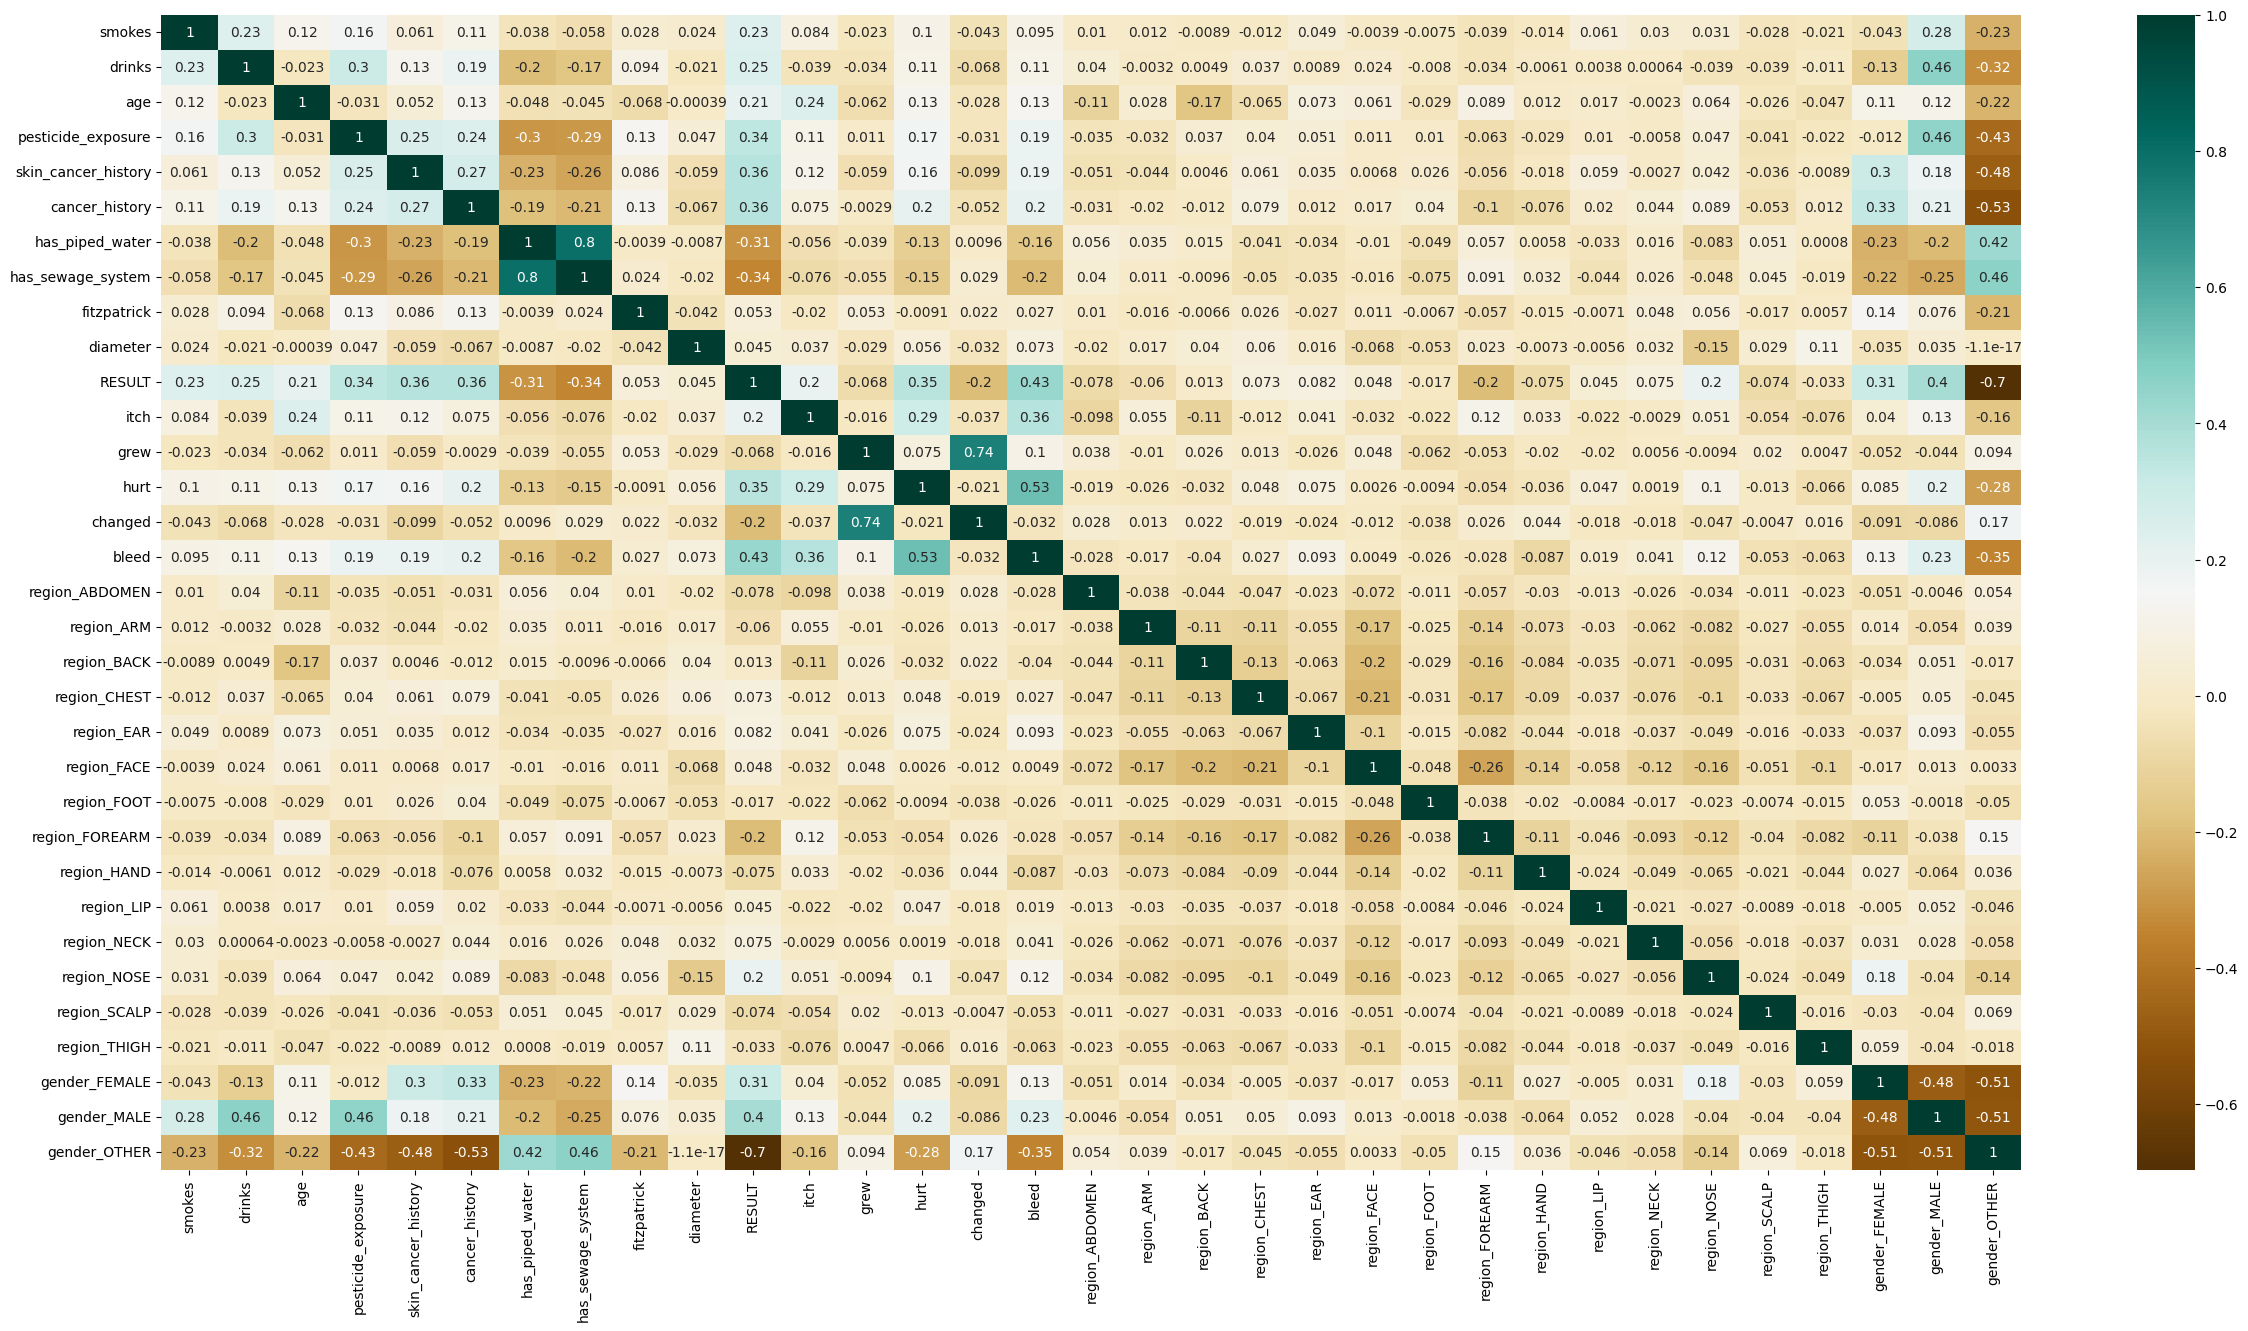

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(30, 15))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

## Saving the dataset.

In [24]:
df.to_csv('metadata.csv', index=False)